In [1]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json
import os
import uproot
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
from coffea import hist, processor 
from coffea.hist import plot
from coffea.util import load, save

In [2]:
year='2018'
hists = load('/Users/hongjieun/MonoTop/notebook_plotting/lep18_compare_Rishabh_Feb18/lep_monotop'+year+'.scaled')

data={
    '2016':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2017':{
        'sr': 'MET',
        'wmcr': 'MET',
        'tmcr': 'MET',
        'wecr': 'SingleElectron',
        #'wecr': 'EGamma',
        'tecr': 'SingleElectron',
        #'tecr': 'EGamma',
        'zmcr': 'MET',
        'zecr': 'SingleElectron',
        #'zecr': 'EGamma',
        'gcr': 'SinglePhoton'
        #'gcr': 'EGamma'
    },
    '2018':{
        'sre': 'EGamma',
        'srm': 'SingleMuon',
        'ttbare': 'EGamma',
        'ttbarm': 'SingleMuon',
        'wjete': 'EGamma',
        'wjetm': 'SingleMuon',
        'dilepe': 'EGamma',
        'dilepm': 'SingleMuon'
    },
}

gentype_map = {
    'garbage':  0,
    'xbb':      1,
    'tbcq':     2,
    'tbqq':     3,
    'zcc':      4,
    'wcq':      5,
    'vqq':      6,
    'bb':       7,
    'bc':       8,
    'b':        9,
    'cc' :     10,
    'c':       11,
    'other':   12
}
data_hists   = hists['data']
bkg_hists    = hists['bkg']
signal_hists = hists['sig']

In [5]:
exp = 0
tot_bkg_yld_array={():0}
region = 'ttbare'

category_map = {
    0 :'fail', 
    1 :'pass', 
    None : '',
}

category=None
sys='nominal'

#mass_binning=[0,40,50,60,70,80,90,100,110,120,130,150,160,180,200,220,240,300]
#mass_binning=[60,70]
#bkg_hists['template']=bkg_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass', mass_binning))
#signal_hists['template']=signal_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))
#data_hists['template']=data_hists['template'].rebin('fjmass',hist.Bin('fjmass','Mass',mass_binning))

#recoil_binning=[250,310,370,470,590,840,1020,1250,3000]
#recoil_binning=[470,590]
#bkg_hists['template']=bkg_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
#signal_hists['template']=signal_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
#data_hists['template']=data_hists['template'].rebin('recoil',hist.Bin('recoil','Recoil',recoil_binning))
    
    
print('------------------------')
print('------------------------')
print('Category:', region, category_map[category])
#print('Recoil bins:',signal_hists['template'].axis('recoil').edges()[()].size-1,signal_hists['template'].axis('recoil').edges()[()])
#print('Mass bins:',signal_hists['template'].axis('fjmass').edges()[()].size-1,signal_hists['template'].axis('fjmass').edges()[()])
#print('Systematic:', sys)
#print('------------------------')
print('------------------------')
print('------------------------')
for p in bkg_hists['template'].identifiers('process'):
    bkg_yld_array = bkg_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).sum('gentype',overflow='all').values()#(overflow='all')
    if () in bkg_yld_array:
        yld = bkg_yld_array[()][:,:,category].sum()
        tot_bkg_yld_array[()]+=bkg_yld_array[()]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

if not region == '':
    yld_array = data_hists['template'].integrate('region',region).integrate('process', data[year][region]).integrate('systematic',sys).sum('gentype',overflow='all').values()#(overflow='all')
    if () in yld_array:
        yld = yld_array[()][:,:,category].sum()
        print('Total observed:', '%.1f' % yld)   
print('------------------------')

for p in signal_hists['template'].identifiers('process'):
    sig_yld_array = signal_hists['template'].integrate('region',region).integrate('process', p).integrate('systematic',sys).sum('gentype',overflow='all').values()#(overflow='all')
    if () in sig_yld_array:
        yld = sig_yld_array[()][:,:,category].sum()
        print(p, '%.1f' % yld)
        #print(p,'S/B %.3f' % (yld/exp))
        print(p,'Significance %.1f' % (yld/np.sqrt(exp)))
        binned_significance=0
        for recoil in range(0,signal_hists['template'].axis('recoil').edges()[()].size-2):
            for mass in range(0,signal_hists['template'].axis('fjmass').edges()[()].size-2):
                pice=np.nan_to_num(sig_yld_array[()][recoil,mass,category].sum()/np.sqrt(tot_bkg_yld_array[()][recoil,mass,category].sum()))
                binned_significance=binned_significance+(pice*pice)
        print(p,'Binned Sig. %.2f' % np.sqrt(binned_significance))
        print('------------------------')


------------------------
------------------------
Category: ttbare 
------------------------
------------------------


KeyError: 'No axis gentype found in <Hist () instance at 0x7fbfee24e410>'

In [3]:
#To optimize cuts based on process yield, i.e. you wanna test some background rejection
exp = 0
region = 'ttbare'
sys = 'nominal'
variable = 'j1phi'
cut_bin = None
nbins = data_hists[variable].integrate('region').integrate('process', 'EGamma').sum(variable,overflow='all').values(overflow='all')[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges(overflow='all')
print(nbins)
print('------------------------')
print('------------------------')
print('Category:', region)
print('Systematic:', sys)
#print('------------------------')
if cut_bin!=None: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
#if cut_bin!=None: print(variable,'< %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).sum(variable,overflow='all').values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

#for p in signal_hists[variable].identifiers('process'):
#    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).sum('gentype',overflow='all').values(overflow='all')
#    if () in yld_array:
#        #yld = np.cumsum(yld_array[()])[nbins-1]
#        yld = yld_array[()].sum()
#        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
#        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
#        print(p, '%.1f' % yld)
#        print(p,'S/B %.3f' % (yld/exp))
#        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
#        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
#        print('------------------------')

if not region == '':
    yld_array = data_hists[variable].integrate('region',region).integrate('process', data[year][region]).sum(variable,overflow='all').values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

1
------------------------
------------------------
Category: ttbare
Systematic: nominal
------------------------
------------------------
DY+HF 50.6
DY+LF 16.1
WW 19.6
WZ 58.8
ZZ 1.4
ST 4260.8
TT 59767.0
W+HF 1148.0
W+LF 494.2
QCD 45.8
------------------------
Total expected: 65862.3
------------------------
Total observed: 64972.0
------------------------



In [230]:
#To optimize cuts based on gentype yield, i.e. define fat-jet tagger pass/fail 
exp = 0
region = 'sr'
variable = 'ZHvsQCD'
cut_bin = 12
nbins = data_hists[variable].integrate('region').integrate('process', 'MET').sum('gentype').values()[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges()

print('------------------------')
print('------------------------')
print('Category:', region)
print('Systematic:', sys)
#print('------------------------')
if cut_bin!=0: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for g in gentype_map.keys():
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process').values()[()][gentype_map[g]]
    yld = np.cumsum(yld_array[()])[nbins-1] - np.cumsum(yld_array[()])[cut_bin]
    tot = bkg_hists[variable].integrate('region',region).integrate('process').sum(variable).values()[()][gentype_map[g]]
    eff = np.nan_to_num(yld/tot)
    print(g, '%.3f' % eff)
print('------------------------')
print()

------------------------
------------------------
Category: sr
Systematic: nominal
XvsQCD > 0.87
------------------------
------------------------
garbage 0.000
xbb 0.883
tbcq 0.793
tbqq 0.740
zcc 0.710
wcq 0.653
vqq 0.596
bb 0.735
bc 0.709
b 0.581
cc 0.468
c 0.413
other 0.273
------------------------



In [4]:
#bkg_hists['j1phi'].identifiers('j1phi')[]
key = 'j1phi'
re = 'ttbare'
print('1: ', data_hists[key].integrate('region',re)[data['2018'][str(re)]].values(overflow='all'))
print('2: ', data_hists[key].integrate('region',re).identifiers('process'))
print('3: ', bkg_hists[key].integrate('region',re).sum(key).values(overflow='all'))
print('4: ', bkg_hists[key].integrate('region',re).identifiers('process'))

1:  {('EGamma',): array([   0.,    0.,  551., 2784., 2945., 2915., 2994., 2852., 2816.,
       2838., 2681., 2343., 2209., 2119., 2150., 2237., 2087., 2028.,
       1986., 1880., 1849., 1486., 1468., 1513., 1344., 1248., 1108.,
       1044., 1131., 1384., 1691., 1949., 2137., 2584.,  621.,    0.,
          0.])}
2:  [<StringBin (EGamma) instance at 0x7ff8fc911690>]
3:  {('DY+HF',): 50.61142189117952, ('DY+LF',): 16.108873504812244, ('WW',): 19.628365861154165, ('WZ',): 58.78943742064812, ('ZZ',): 1.4227358826143293, ('ST',): 4260.784554445181, ('TT',): 59766.96667822726, ('W+HF',): 1148.048551959722, ('W+LF',): 494.175773162774, ('QCD',): 45.758097923305534}
4:  [<StringBin (DY+HF) instance at 0x7ff8fc8fcad0>, <StringBin (DY+LF) instance at 0x7ff8fc8fcb50>, <StringBin (WW) instance at 0x7ff8fc8fccd0>, <StringBin (WZ) instance at 0x7ff8fc8fcd50>, <StringBin (ZZ) instance at 0x7ff8fc8fcdd0>, <StringBin (ST) instance at 0x7ff8fc8fce50>, <StringBin (TT) instance at 0x7ff8fc8fced0>, <String

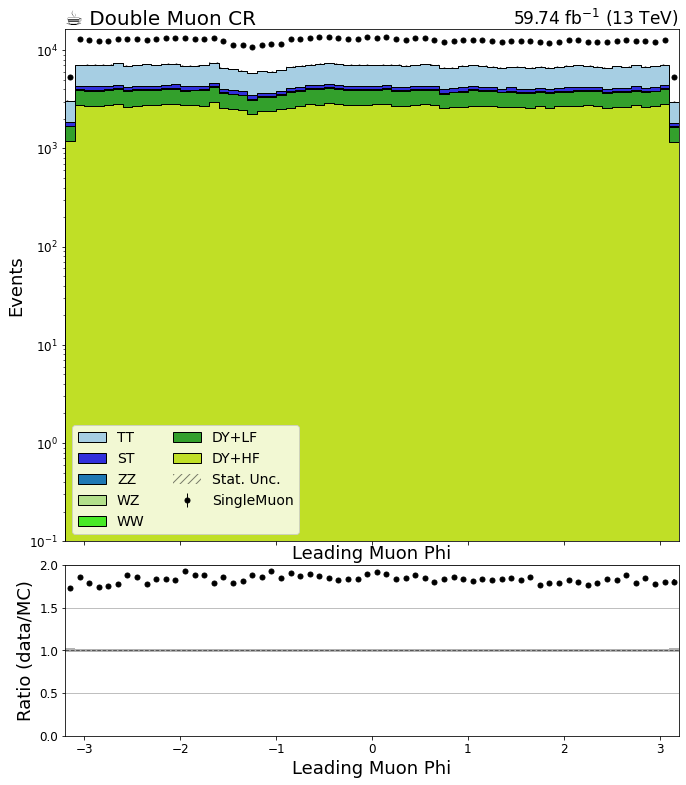

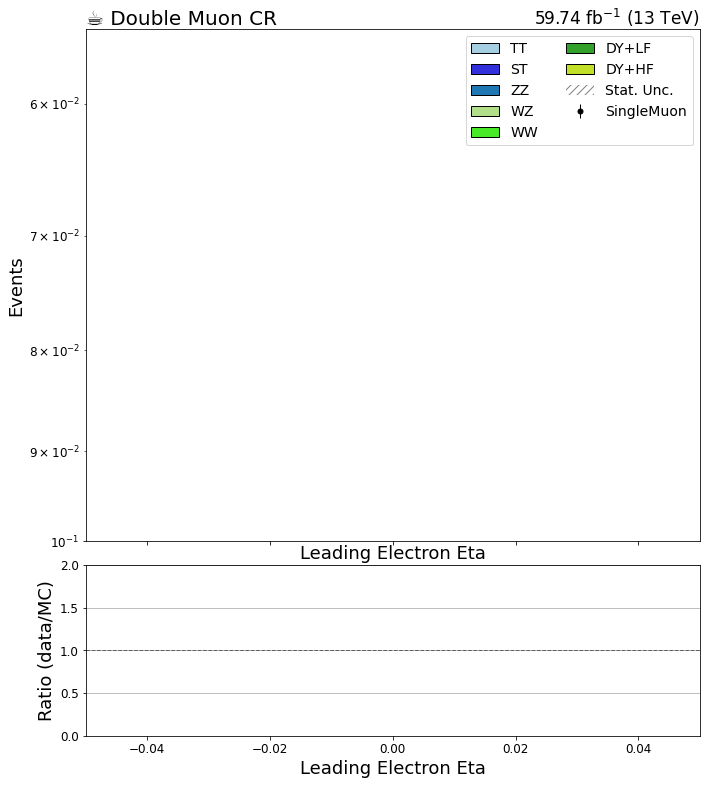

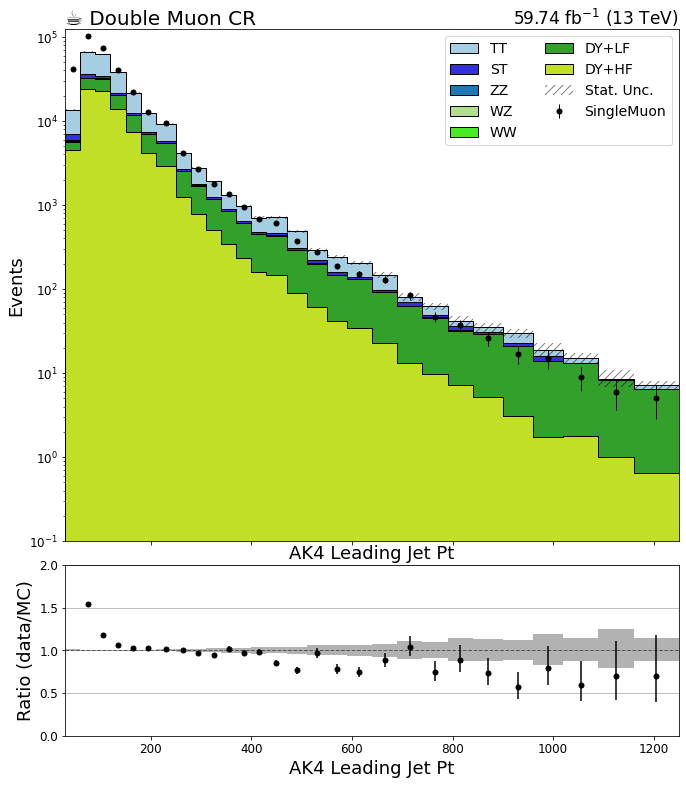

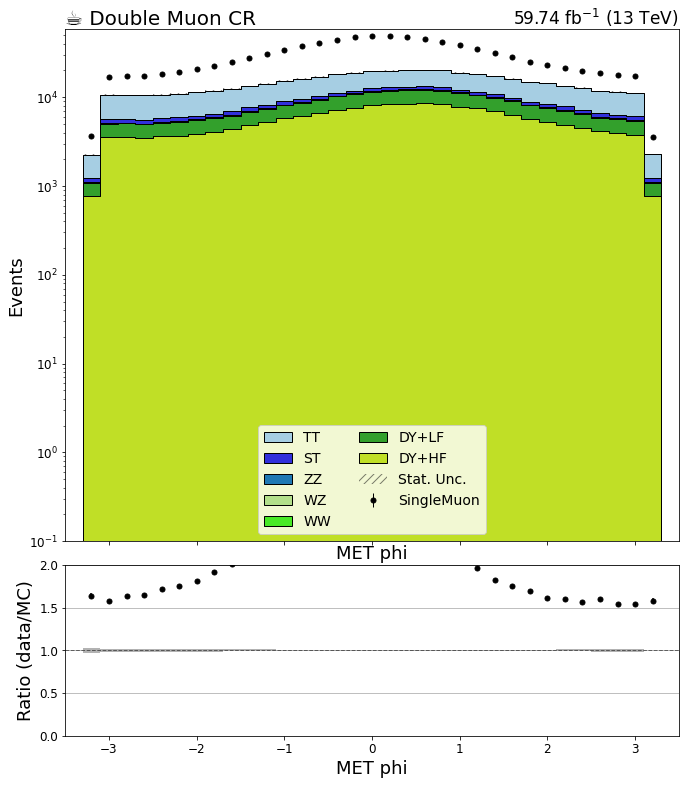

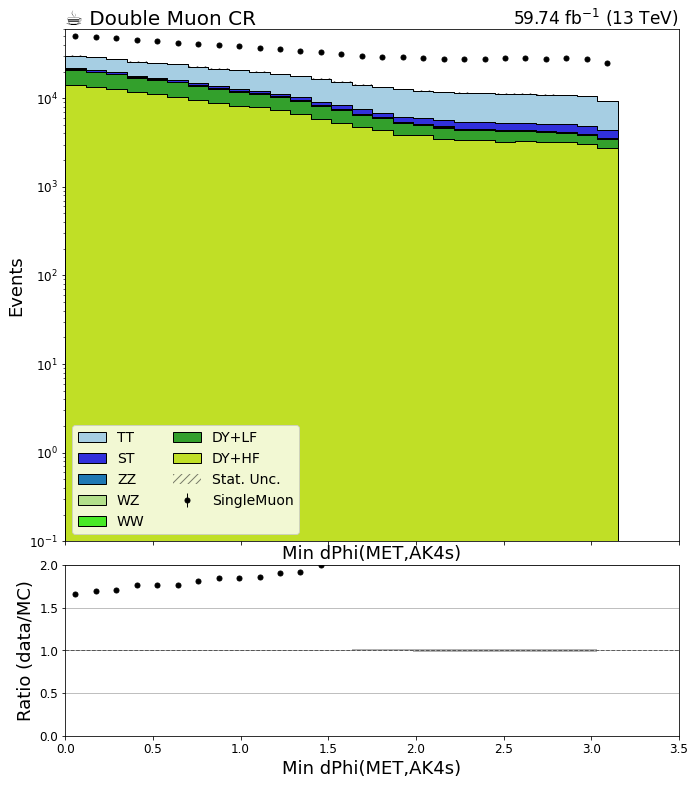

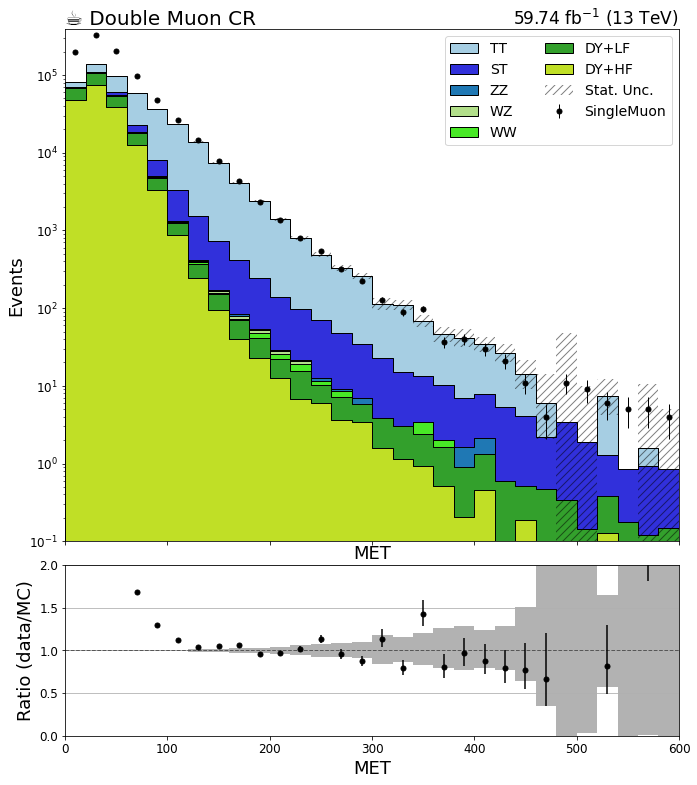

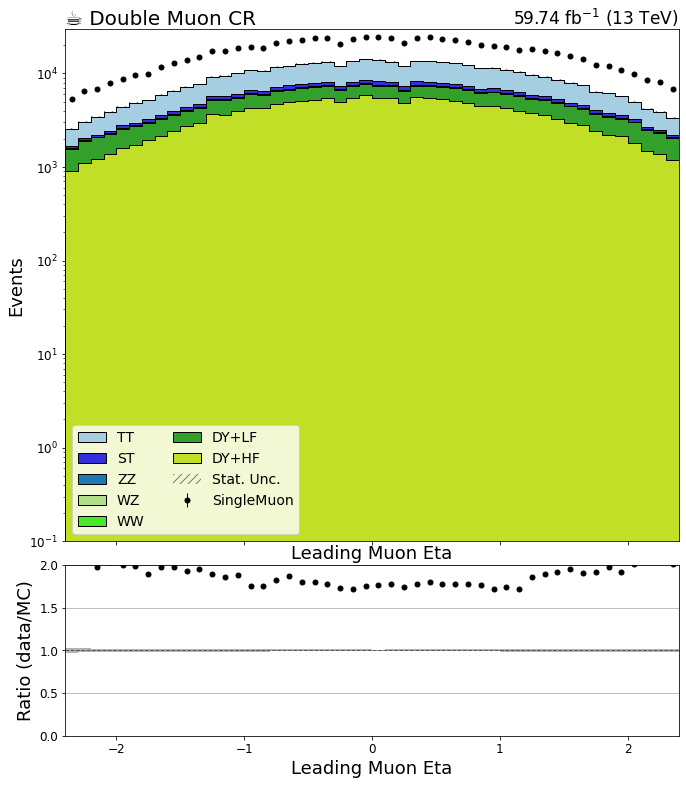

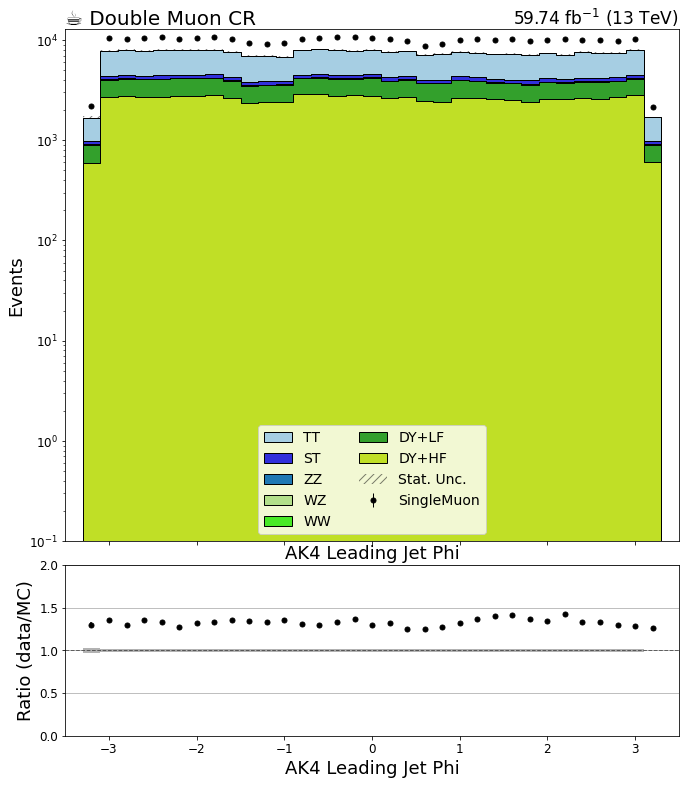

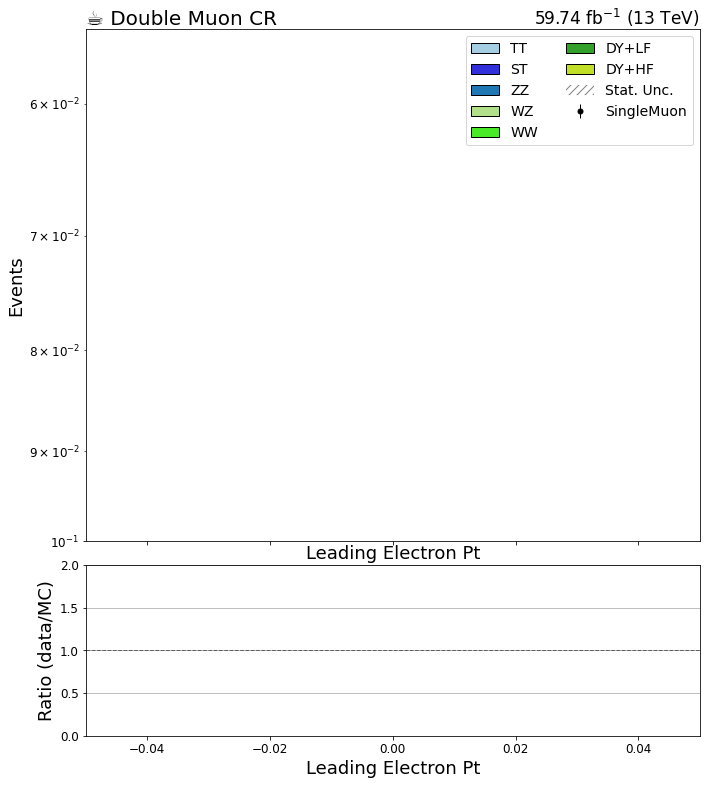

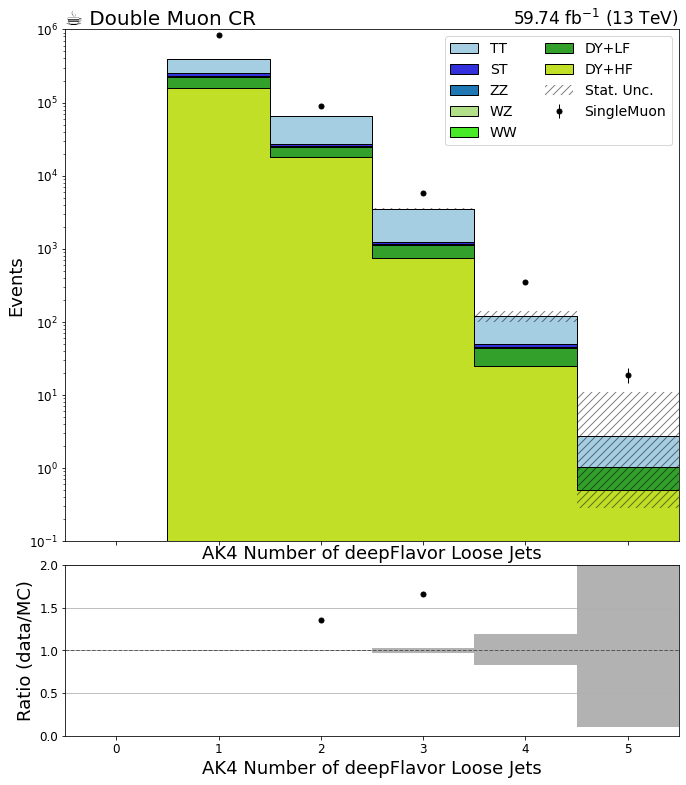

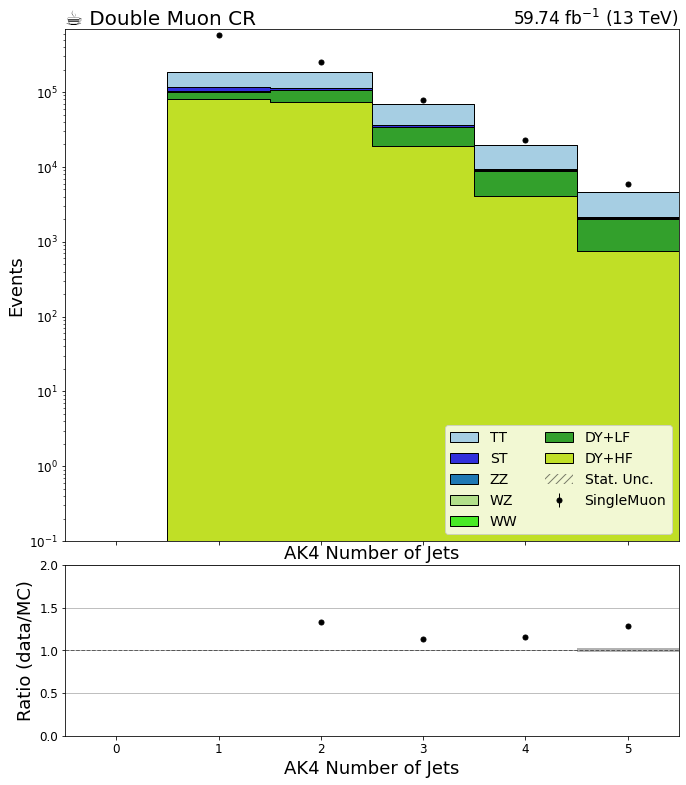

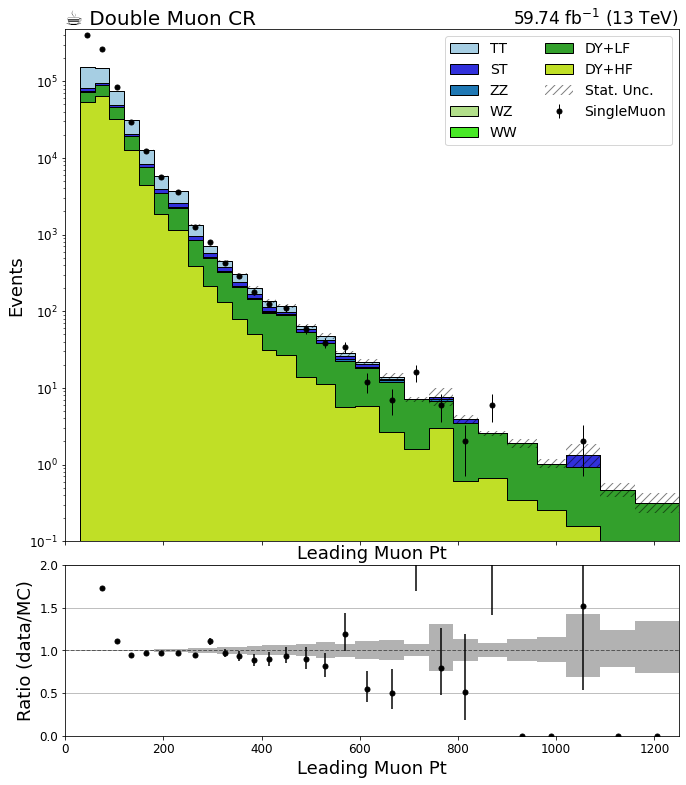

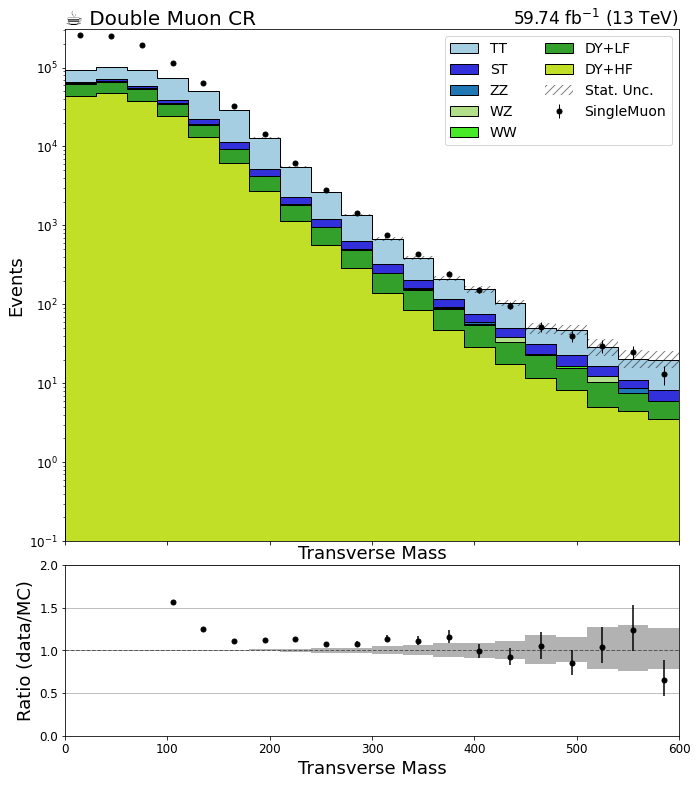

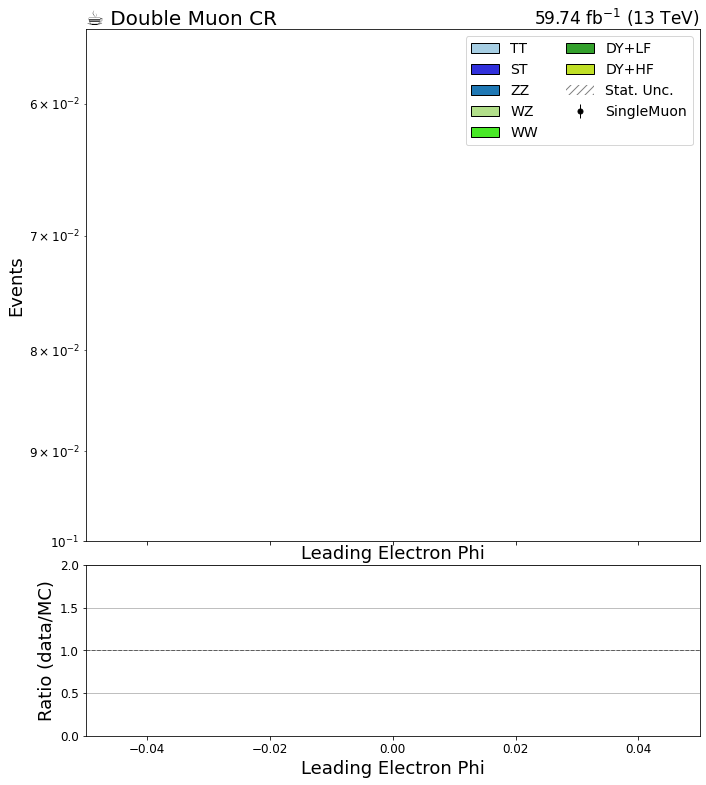

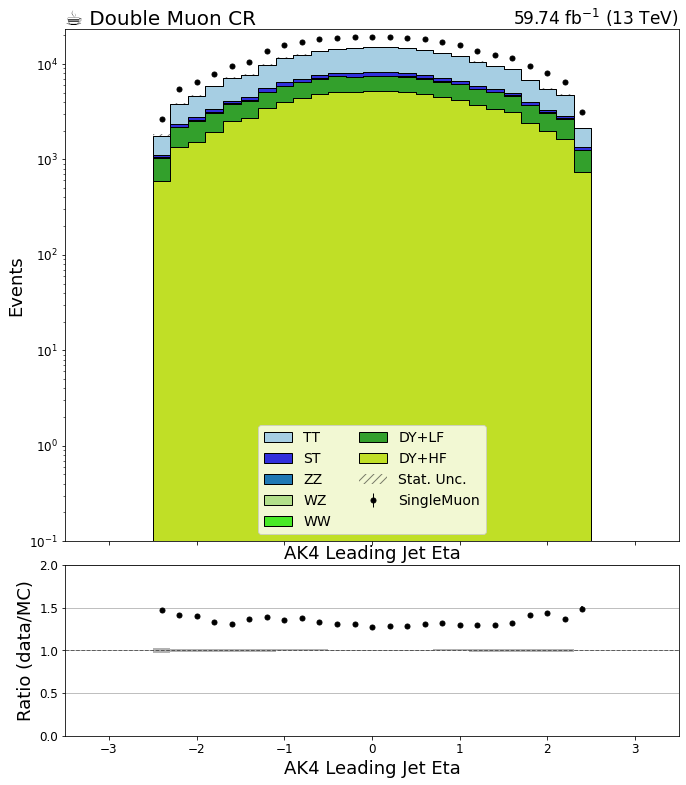

In [6]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler

region = 'dilepm'
sys = 'nominal'



if not os.path.exists('./plots'):
    os.makedirs('./plots')
R = {}
R['sre'] = 'Electron Signal Region'
R['srm'] = 'Muon Signal Region'
R['ttbare'] = 'Single Electron Top CR'
R['ttbarm'] = 'Single Muon Top CR'
R['wjete'] = 'Single Electron W CR'
R['wjetm'] = 'Single Muon W CR'
R['dilepe'] = 'Double Electron CR'
R['dilepm'] = 'Double Muon CR'

for key in bkg_hists.keys():
    if key=='sumw': continue
    if key=='template': continue
    if key=='cutflow': continue
    #if key!='fjmass': continue
    for j in bkg_hists[key].identifiers('region'):
        if not (str(j) == region): continue
        plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
        fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
        error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
        nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
        data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
        #colors = ['#a6cee3','#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c']
        colors = ['#a6cee3', '#3130db', '#1f78b4', '#b2df8a', '#48e926', '#33a02c', '#c0df26',
                  '#fb9a99', '#d02ba7', '#e31a1c', '#fdbf6f', '#ff7f00', '#cab2d6', '#c64bc4',
                  '#6a3d9a', '#a9ce26', '#ffff99', '#b15928', '#edcc43']


        fig, (ax, rax) = plt.subplots(2, 1, figsize=(11,13), gridspec_kw={"height_ratios": (3, 1)}, sharex=True)
        fig.subplots_adjust(hspace=.07)
        ax.set_prop_cycle(cycler(color=colors))
        
       
        plot.plot1d(data_hists[key].integrate('region',j)[data[year][str(j)]],
        #plot.plot1d(data_hists[key].integrate('region',j).sum(key)[data[year][str(j)]],            
                overlay="process",
                ax=ax,
                clear=False,
                error_opts=data_err_opts
                   )

        plot.plot1d(bkg_hists[key].integrate('region',j),
        #plot.plot1d(bkg_hists[key].integrate('region',j).sum(key),
                overlay="process",
                ax=ax,
                clear=False,
                stack=True,
                fill_opts=fill_opts,
                error_opts=error_opts
                   )
        
        plot.plotratio(data_hists[key].integrate('region',j).integrate('process',data[year][str(j)]),
        #plot.plotratio(data_hists[key].integrate('region',j).sum(key).integrate('process',data[year][str(j)]),
                   bkg_hists[key].integrate('region',j).sum('process'),
                   #bkg_hists[key].integrate('region',j).sum(key).sum('process'),
                   ax=rax,
                   #overflow='over',
                   error_opts=data_err_opts,
                   denom_fill_opts={},
                   guide_opts={},
                   unc='num'
                   )
        
        rax.set_ylabel('Ratio (data/MC)')
        rax.set_ylim(0.0,2.0)
        rax.grid(axis='y')
        
        ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
        args = {'linestyle':'--', 'linewidth': 5}
        ax.autoscale(axis='x', tight=True)
        ax.set_yscale('log')
        if(key=='dilepmass'): ax.set_xlim(50, 130)
        ax.set_ylim(.1, None)
        leg = ax.legend(ncol=2, loc='best')
        
        coffee = plt.text(0., 1., u"☕ "+R[str(j).split('_')[0]], fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
        lumi = plt.text(1., 1., r"59.74 fb$^{-1}$ (13 TeV)", fontsize=17, horizontalalignment='right', verticalalignment='bottom', transform=ax.transAxes)
        os.system('mkdir -p ./plots/lep_monotop'+year+'/'+str(j)+'/')
        plot_path = os.path.abspath('./plots/lep_monotop'+year+'/'+str(j)+'/') 
        plot_name = 'stack_'+key+'.png'
        fig.savefig(os.path.join(plot_path, plot_name))

In [9]:
#To optimize cuts based on process yield, i.e. you wanna test some background rejection
exp = 0
region = 'sr'
sys = 'nominal'
variable = 'recoil'
cut_bin = None
nbins = data_hists[variable].integrate('region').integrate('process', 'MET').sum('gentype',overflow='all').values(overflow='all')[()].size
cut_value_array = data_hists[variable].integrate('region').integrate('process', 'MET').axis(variable).edges(overflow='all')

print('------------------------')
print('------------------------')
print('Category:', region)
print('Systematic:', sys)
#print('------------------------')
if cut_bin!=None: print(variable,'> %.2f' % cut_value_array[()][cut_bin+1])
#if cut_bin!=None: print(variable,'< %.2f' % cut_value_array[()][cut_bin+1])
print('------------------------')
print('------------------------')
for p in bkg_hists[variable].identifiers('process'):
    yld_array = bkg_hists[variable].integrate('region',region).integrate('process', p).sum('gentype',overflow='all').values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        exp += yld
        print(p, '%.1f' % yld)

print('------------------------')
print('Total expected:', '%.1f' % exp)
print('------------------------')

for p in signal_hists[variable].identifiers('process'):
    yld_array = signal_hists[variable].integrate('region',region).integrate('process', p).sum('gentype',overflow='all').values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print(p, '%.1f' % yld)
        print(p,'S/B %.3f' % (yld/exp))
        print(p,'S/sqrt(B) %.1f' % (yld/np.sqrt(exp)))
        #print(p,'Fraction %.2f' % (yld/np.cumsum(yld_array[()])[16]))
        print('------------------------')

if not region == '':
    yld_array = data_hists[variable].integrate('region',region).integrate('process', data[year][region]).sum('gentype',overflow='all').values(overflow='all')
    if () in yld_array:
        #yld = np.cumsum(yld_array[()])[nbins-1]
        yld = yld_array[()].sum()
        if cut_bin!=None: yld = yld - np.cumsum(yld_array[()])[cut_bin]
        #if cut_bin!=None: yld = np.cumsum(yld_array[()])[cut_bin]
        print('Total observed:', '%.1f' % yld)   
print('------------------------')
print()

------------------------
------------------------
Category: sr
Systematic: nominal
------------------------
------------------------
Hbb 114.8
DY+HF 102.1
DY+LF 1619.1
WW 2066.9
WZ 3020.2
ZZ 1796.6
ST 1914.6
TT 8838.1
W+HF 16879.8
W+LF 121452.2
Z+HF 21379.9
Z+LF 230608.1
QCD 4135.7
------------------------
Total expected: 413928.2
------------------------
Mhs_50 4742.9
Mhs_50 S/B 0.011
Mhs_50 S/sqrt(B) 7.4
------------------------
Mhs_70 4053.4
Mhs_70 S/B 0.010
Mhs_70 S/sqrt(B) 6.3
------------------------
Mhs_90 3578.4
Mhs_90 S/B 0.009
Mhs_90 S/sqrt(B) 5.6
------------------------
MonoJet 36709.1
MonoJet S/B 0.089
MonoJet S/sqrt(B) 57.1
------------------------
MonoW 780.5
MonoW S/B 0.002
MonoW S/sqrt(B) 1.2
------------------------
MonoZ 246.7
MonoZ S/B 0.001
MonoZ S/sqrt(B) 0.4
------------------------
Total observed: 502342.0
------------------------



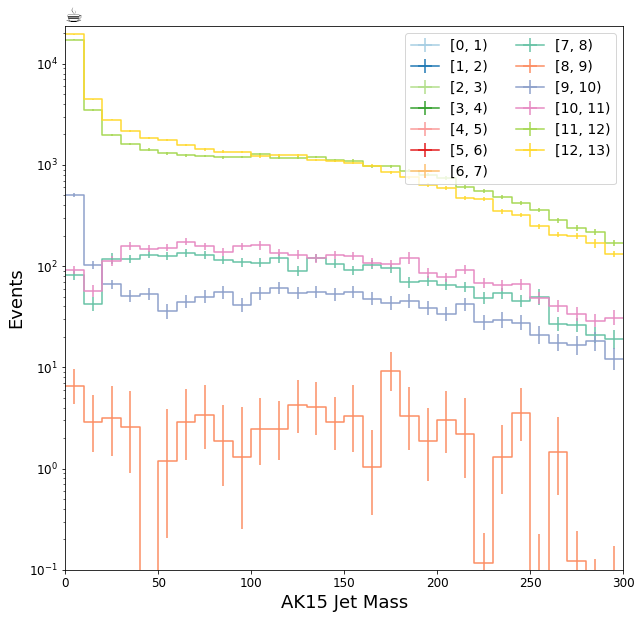

In [121]:
#http://colorbrewer2.org/#type=qualitative&scheme=Paired&n=6 : colors
from cycler import cycler
if not os.path.exists('unstack'):
    os.makedirs('unstack')

for key in bkg_hists.keys():
    if 'fjmass' !=key: continue
    plt.rcParams.update({'figure.max_open_warning': 0,'font.size': 14, 'axes.titlesize': 18, 'axes.labelsize': 18, 'xtick.labelsize': 12, 'ytick.labelsize': 12})
    fill_opts = {'edgecolor': (0,0,0,0.3), 'alpha': 1}
    error_opts = {'label':'Stat. Unc.', 'hatch':'///', 'facecolor':'none', 'edgecolor':(0,0,0,.5), 'linewidth': 0}
    nostack_fill_opts = {'alpha': 0.2, 'label': '_nolabel_'}
    data_err_opts = {'linestyle':'None', 'marker': '.', 'markersize': 10., 'color':'k'}#, 'elinewidth': 1, 'emarker': '_'}
    colors = ['#a6cee3', '#1f78b4','#b2df8a','#33a02c','#fb9a99','#e31a1c','#fdbf6f','#66c2a5', '#fc8d62', '#8da0cb', '#e78ac3', '#a6d854', '#ffd92f']
    fig, ax = plt.subplots(1, 1, figsize=(10,10))
    fig.subplots_adjust(hspace=.07)
    ax.set_prop_cycle(cycler(color=colors))
    plot.plot1d(bkg_hists[key].integrate('region').integrate('process','W+HF'),
                overlay="gentype",
                ax=ax,
                clear=False,
                stack=False,
                )
    ax._get_lines.prop_cycler = ax._get_patches_for_fill.prop_cycler
    args = {'linestyle':'--', 'linewidth': 5}
    ax.autoscale(axis='x', tight=True)
    ax.set_yscale('log')
    if(key=='dielemass' or key=='dimumass'): ax.set_xlim(50, 130)
    ax.set_ylim(.1, None)
    leg = ax.legend(ncol=2, loc='best')
    coffee = plt.text(0., 1., u"☕ ", fontsize=20, horizontalalignment='left', verticalalignment='bottom', transform=ax.transAxes)
    plot_path = os.path.abspath('unstack')
    plot_name = 'unstack'+key+'_'+R[str(j).split('_')[0]]+'.png'
    #fig.savefig(os.path.join(plot_path, plot_name))